***
<center><h1><b>Estimation de la taille d'un graphe par marches aléatoires</b></h1><center>
    
***

***

<center><h3>1. Introduction du projet</h3></center>

***

<p style='text-align: justify;'> 
Etant donné un graphe $G = (V , E)$ fini, non orienté et connexe, on cherche à estimer sa taille. On suppose qu’on a accès au graphe de la manière suivante: on peut accéder à un sommet particulier $i_0 \in V$ du graphe, et ayant accédé à un sommet $i$ du graphe, on peut alors accéder à n’importe quel voisin $j$ de $i$ dans $G$.</p>
<p style='text-align: justify;'>
On va considérer l’algorithme suivant pour l’estimation de cette taille: On fixe une longueur $τ$ , et un
nombre cible $\ell$. A chaque étape $t ≥ 1$, on construit une marche aléatoire de longueur $τ$ , soit:
$X_0^t, . . . , X_τ^t$ sur le graphe, issue de $X_0^t = i_0$. Par définition, sachant les choix $X_0^t, . . . , X_{s−1}^t, X_s^t$ est sélectionné uniformément au hasard parmi les voisins de $X_{s−1}^t$ dans $G$. On note $Y_t = X_τ^t$ le dernier sommet obtenu à la $t$-ème marche aléatoire.</p>
<p style='text-align: justify;'> 
On dit qu’on a une collision à l’étape $t$ si $Y_t \in ${$ Y_1, . . . , Y_{t−1} $} $=K_t$. On note $C_\ell$ l’instant de la $\ell$-ème
collision, soit:
$C_\ell$ = $inf$ { $t\geq1$, $\sum_{s=1}^t \mathbb 1_ {Y_s\in K_s} = \ell  $}
L’estimateur $\hat{N}$ du nombre de sommets $N:=|V|$ du graphe est alors donné par
$\hat{N}=\frac{C_{\ell}^{2}}{2\ell}$
·
La partie théorique établit des garanties théoriques sur cette procédure d’estimation. La partie simulation consiste à la mise en oeuvre de cet algorithme.
</p>

***

<center><h3>2. Partie théorique</h3></center>

***

<h4>Question T1</h4>
<i>On veut exprimer la loi de probabilité des échantillons $Y_t$.</i>

<p style='text-align: justify;'>
Soit $i \in V$. Considérons l'ensemble des voisins de $i$, qu'on note $S_i$. On définit le vecteur $M_{i_0}$ de la manière suivante: la composante i de ce vecteur vaut $1$ si $i=i_0$ et $0$ sinon, pour $i_0$ choisi. En effet, on peut se fixer un indice $i_0$ de départ, comme dans l'énoncé, car les coefficients de la matrice $P$ représentent la probabilité de passer de $i$ à $j$, ou inversement ($P$ est symétrique). 
<p style='text-align: justify;'>
On peut écrire:
$\mathbb{P}(Y_t=i) = \sum_{j=0}^{N} \mathbb{P}(X_{\tau-1}^{t}=j) \mathbb{P}(Y_t=i | X_{\tau-1}^{t}=j)$ = $\sum_{j=0}^{N}$ $\frac{1}{d}$  $P(X_{\tau-1}^{t}=j)$ $\mathbb 1_{j \in S_i}$ par la formule des probabilités totales.
<p style='text-align: justify;'>
On a alors:
$\pi = P \cdot (\mathbb{P}(X_{\tau-1}^{t}=i)_{i \in V}$ . En réitérant le procédé $\tau$ fois, on obtient le résultat:
    <p style='text-align: center;'>
$\begin{equation}
\boxed{  
    \pi = P^{\tau} \cdot M_{i_0}}
\end{equation}$
        </p>
</p>
</p>
</p>

<h4>Question T2</h4>
<i>On veut montrer la convergence de la loi des $Y_t$ vers la loi uniforme sur $V$.</i>

<p style='text-align: justify;'>
On considère le vecteur $v = \begin{pmatrix}
1\\
\vdots \\
1\end{pmatrix}$.
On sait déjà que la matrice $P$ est une matrice réelle et symétrique. Le théorème spectral appliqué à $P$ nous donne que c'est une matrice diagonalisable dans une base orthonormale.
</p>
<p style='text-align: justify;'>
Trouvons le sous-espace propre associé à la valeur propre 1. On a que $P \cdot v = \frac{1}{d} \cdot \begin{pmatrix}
d \\
\vdots \\
d\end{pmatrix} = v$
</p>
<p style='text-align: justify;'>
Ainsi le sous-espace propre associé à la valeur propre 1 est $Vect(v) = Vect(\frac{v}{||v||}) = Vect(\frac{v}{\sqrt{N}})$ (On a normalisé le vecteur $v$).
</p>
<p style='text-align: justify;'>
Soit $Q$ la matrice de passage de la base canonique à la base des vecteurs propres de $P$. On note $D=diag(1, \lambda_{2}, ..., \lambda_{n})$,  alors $D^{\tau}=diag(1, \lambda_{2}^{\tau}, ..., \lambda_{n}^{\tau})$.
</p>
<p style='text-align: justify;'>
On a alors que $P = Q  D  ^t Q$, d'où $P^{\tau}$ = $Q D^{\tau}$ $(^t Q)$, et par suite  $\pi$ $= P^{\tau} M_{i_0}$ $=Q D^{\tau}$ $(^t Q)$ $M_{i_0}$
<p style='text-align: justify;'>
D'où, lorsque $\tau$ tend vers l'infini, $\pi$ tend vers $Q$ $diag(1,0,..,0)$ $(^t Q)$ $M_{i_0}$ (en utilisant la norme $||.||_{2}$). Or $Q$ est de la forme $(\frac{v}{\sqrt{N}}, C_{2}, ..., C_{N})$ où $C_{i}$ désigne la colonne numéro $i$ de $Q$.
</p>   
<p style='text-align: justify;'>
On a alors que $\pi$ tend vers $N^{'} M_{i_0}$ où $N^{'}$ est la matrice dont tous les éléments sont égaux à $\frac{1}{N}$.
</p>
<p style='text-align: justify;'>
On déduit alors directement que $\boxed{\pi \xrightarrow {\tau \rightarrow +\infty}  \begin{pmatrix} \frac{1}{N} \\
\vdots \\
\frac{1}{N} \end{pmatrix}}
$, ce qui signifie que $\pi$ converge bien vers la loi uniforme sur $V$.
</p>

<h4>Question T3:</h4>
<i>On veut établir une formule relative aux instants de collision.</i>

<p style='text-align: justify;'>
L'évènement {$C_{\ell-1}=m$} signifie qu'on a eu  $\ell-1$ collisions après $m$ réalisations de $Y$. Sachant que cet évènement ést réalisé , on veut calculer la probabilité de l'évènement {$C_{\ell}-C_{\ell-1}>n$} , ce qui revient à calculer la probabilité qu'on ait besoin de plus de $n$ réalisations supplémentaires de Y pour obtenir la collision suivante ou encore avoir $\ell$ collisions au total. Il faut donc que pour les $n$ réalisations suivantes de $Y$, on se place sur des sommets qui ne sont pas jusqu'à cet instant visités par $Y$ : après les $\ell-1$ collisions, on aura visité un nombre de $m-(\ell-1)$ sommets différents. Il reste alors $N-(m-\ell+1)$ sommets sur lesquels on peut tomber. A chaque nouvelle réalisation de $Y$ ce nombre diminue de $1$ évidemment. </p>
<p style='text-align: justify;'>
Comme les $Y_t$ sont uniforméments distribués sur $V$, on a une probabilité de $\frac{(N-m+\ell-1)}{N}$ de ne pas faire de nouvelles collisions après la $(m+1)^{ième}$ réalisation de la variable $Y$.

Si on refait le processus $n$ fois , et en utilisant l'indépendance des $Y_{t}$ on obtient: 
</p>


\begin{equation}
\boxed{\mathbb{P}\left(C_{\ell}-C_{\ell-1}>n \mid C_{\ell-1}=m\right)=\frac{(N-m+\ell-1)(N-m+\ell) \cdots(N-m+\ell-n)}{N^{n}}}
 \end{equation}

<h4>Question T4:</h4>
<i>On veut établir des résultats de convergence.</i>

<p style='text-align: justify;'>
On peut écrire, d'après le résultat de la question précédente:
</p>
<p style='text-align: justify;'>
\begin{equation}
P\left(C_{\ell}-C_{\ell-1}>b \sqrt{N} \mid C_{\ell-1}=a \sqrt{N}\right)=\frac{1}{N^{b\sqrt{N}}} \times \frac{(N-a \sqrt{N}+\ell-1) !}{\left(N-a \sqrt{N}+\ell-b\sqrt{N}-1)!\right.} 
\end{equation}
</p>
<p style='text-align: justify;'>
Or la formule de Stirling nous donne que:
\begin{equation}\
\ (N-a \sqrt{N}+\ell-1) ! \underset{+\infty}{\sim} \sqrt{2 \pi(N-a \sqrt{N}+\ell-1)}\left(\frac{N-a \sqrt{N}+\ell-1}{e}\right)^{N-a \sqrt{N}+\ell-1}
\end{equation}
Ce qui donne:
\begin{equation}\
\ (N-a \sqrt{N}+\ell-1) ! \underset{+\infty}{\sim}{\sqrt{2 \pi N}} e^{N-a \sqrt{N}+\ell-1}(\ln (N-a \sqrt{N}+\ell-1)-1))
\end{equation}
De même, par la formule de Stirling:
\begin{equation}
(N-b \sqrt{N}-a \sqrt{N}+\ell-1) ! \underset{+\infty}{\sim} \sqrt{2 \pi N} e^ {N-a \sqrt{N}+\ell-b \sqrt{N}-1}(\ln (N-a \sqrt{N}+\ell-b \sqrt{N}-1)-1))
\end{equation}
On déduit alors l'équivalence suivante:
\begin{equation}
P\left(C_{\ell}-C_{\ell-1}>b \sqrt{N} \mid C_{\ell-1}=a \sqrt{N}\right)\underset{+\infty}{\sim}  e^{(N-a \sqrt{N}+\ell-b \sqrt{N}-1) \ln \left(\frac{N-a \sqrt{N}+\ell-1}{N-a \sqrt{N}+\ell-b \sqrt{N}-1}\right)+b \sqrt{N}(\ln (N-a \sqrt{N}+\ell-1)-\ln N-1)}
\end{equation}
Or, en effectuant un développement asymptotique au voisinage de $+\infty$:
\begin{equation}
\begin{aligned}
ln (N-a \sqrt{N}+\ell-1) &=\ln N+\ln \left(1-\frac{a}{\sqrt{N}}+\frac{\ell-1}{N}\right) = \ln N-\frac{a}{\sqrt{N}}+o\left(\frac{1}{N}\right)
\end{aligned}
\end{equation}
On obtient alors que:
\begin{equation}
P\left(C_{\ell}-C_{\ell-1}>b \sqrt{N} \mid C_{\ell-1}=a \sqrt{N}\right)\underset{+\infty}{\sim} e^{b \sqrt{N}-\frac{b^{2} N}{2(N-a \sqrt{N}+\ell-b \sqrt{N}-1)}-ab-b\sqrt{N}
}\end{equation}

D'où:
\begin{equation}
\boxed{
P\left(C_{\ell}-C_{\ell-1}>b \sqrt{N} \mid C_{\ell-1}=a \sqrt{N}\right)\underset{+\infty}{\sim} e^{-ab-\frac {b^2} 2}}\end{equation}
</p>
<p style='text-align: justify;'>
Il nous reste à montrer la deuxième formule. Pour cela, on utilise que $C_{\ell}>C_{\ell-1}$ et  $C_{\ell-1} \geqslant 0$ pour pouvoir écrire que, pour $x,y$ strictement positifs fixés:
$P\left(\frac{[ C_{\ell}^{2}-C_{\ell-1}^2]}{2 N}>y \mid \frac{C_{\ell-1}^{2}}{2 N}=x\right)
=P\left(C_{\ell}-C_{\ell-1}>\sqrt{N}(\sqrt{2(x+y)}-\sqrt{2 x}) \mid C_{\ell-1}=\sqrt{2 x N}\right).$ </p>
<p style='text-align: justify;'>
Maintenant, on peut directement écrire, d'après les calculs effectués dans les parties précédentes de cette question, le résultat suivant:
$P\left(C_{\ell}-C_{\ell-1}>\sqrt{N}(\sqrt{2(x+y)}-\sqrt{2 x}) \mid C_{\ell-1}=\sqrt{2 x N}\right)\underset{N\to\infty}{\longrightarrow}
e^{-\sqrt{2 x} \times (\sqrt{2(x+y)}-\sqrt{2 x})-\frac{(\sqrt{2(x+y)}-\sqrt{2 x})^{2}}{2}}=e^{2 x-2 \sqrt{x^{2}+x y}-\frac{2(x+y)+2 x-4 \sqrt{x^{2}+x y}}{2}}
=e^{-y}$, d'où:
</p>
<p style='text-align: justify;'>
\begin{equation}
\boxed{
P\left(\frac{[ C_{\ell}^{2}-C_{\ell-1}^2]}{2 N}>y \mid \frac{C_{\ell-1}^{2}}{2 N}=x\right)\underset{N\to\infty}{\longrightarrow}
e^{-y}  }
\end{equation}
</p>

***

<center><h3>3. Partie simulation</h3></center>

***

<h4>Question S1:</h4>
<i>Implémentation de l'algorithme.</i>

In [1]:
#On va avoir besoin de certaines bibliothèques pour nos simulations.
import random as rd
import matplotlib.pyplot as plt

In [2]:
#On commence par écrire une fonction simple, qui renvoie une liste des voisins d'un élement i d'un graphe.
#On va considérer les cas où le graphe est un hypercube et le cas du cycle.
#On a besoin de 3 paramètres: l'élément i, le graphe V et son nom ngr.
def listeVoisins(i, V, ngr):
    if ngr == "cycle":
        if i == len(V):
            return [1, len(V)-1]
        elif i == 1:
            return [2, len(V)]
        else:
            return [(i-1), (i+1)]
    if ngr == "hypercube":
        lVoisins = []
        for k in range (len(i)):
            m1 = list(i[:k])
            m2 = [(abs(i[k]-1))]
            m3 = list(i[(k+1):])
            m = m1 + m2 + m3
            lVoisins.append(m)
        return lVoisins

In [3]:
#On va écrire une fonction qui renvoie une valeur de Y pour une simulation.
#On a besoin de 5 paramètres: le nombre de pas nbPas, la longueur du graphe N, la valeur initiale i0, le graphe V et son nom.
#On va introduire un vecteur Xpos pour les positions.
def simul(V, ngr, N, nbPas, i0):
    Xpos = [i0]
    for i in range (1, nbPas):
        j = rd.randint(1,10)
        if j == 1:
            Xpos.append(Xpos[i-1]) #Probabilité 1/10
        else:
            lVoisins = listeVoisins(Xpos[i-1], V, ngr)
            n = rd.randint(1, len(lVoisins))
            Xpos.append(lVoisins[n-1]) #On continue vers un voisin
    return Xpos[-1] #C'est Y, dernière valeur dans X

<h4>Question S2:</h4>
<i>Premier test de l'algorithme.</i>

In [4]:
#Pour le cas de l'hypercube, on a besoin de pouvoir transformer un nombre quelconque en élément de l'ensemble {0,1}.
#Le stockage sous forme de liste sera justifié dans l'étape suivante.
def transformerNb(n):
    l = []
    while n>0:
        l.append(n%2)
        n = int (n/2)
    return l

In [5]:
#On peut à présent créer un hypercube de dimension delta en complétant la liste l:
#On a naturellement besoin du nombre n et de la dimension de l'hypercube.
def binaire(n, delta):
    l = transformerNb(n)
    if len(l) != delta:
        i = len(l)
        while i<delta:
            l.append(0)
            i=i+1
    return l

In [6]:
#Il nous reste encore à écrire une fonction qui nous indique si un élément x est présent dans X.
#Nous aurons alors tous les outils nécessaires pour tester l'algorithme dans le cas de l'hypercube.
def appartient(x, X):
    for i in range (len(X)):
        if X[i] == x:
            return True
    return False

cas du paramètre égal à 5 : complet
cas du paramètre égal à 10 : complet
cas du paramètre égal à 50 : complet
cas du paramètre égal à 100 : complet


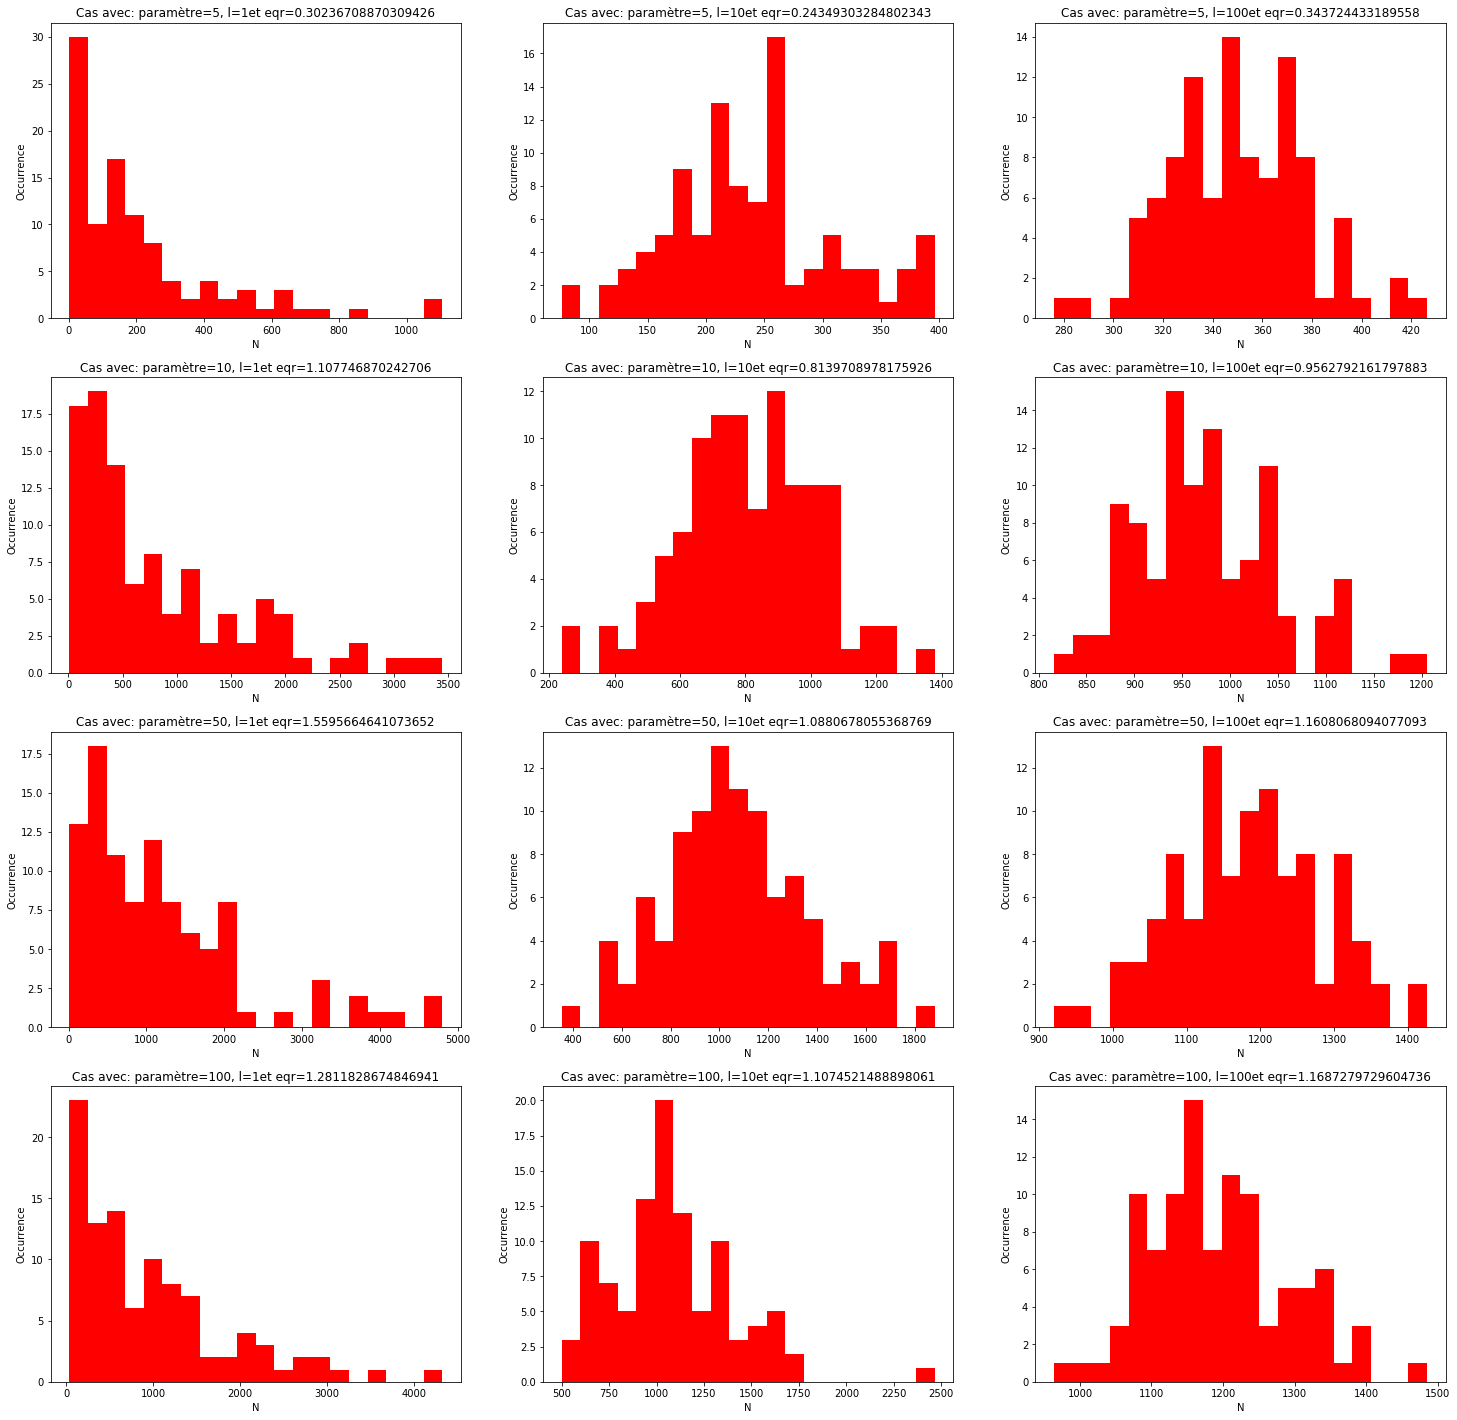

In [7]:
#On peut à présent afficher les histogrammes demandés.
N = 1024

#On commence par créer un graphe V vide:
V = []

#On remplit V pour construire l'hypercube:
for i in range(N):
    b = binaire(i,10)
    V.append(b)

#La donnée exige de choisir les paramètres 5, 10, 50 et 100:
param = [5,10,50,100]
#On fait de même pour l:
Lvalues = [1,10,100]
#On introduit l'erreur quadratique relative et les valeurs de N pour chaque l à un élément du tableau param fixé:
eqr = [0,0,0]
Nvalues = [[],[],[]]
#On écrit ngr et l'indice de départ, on initialise Y:
ngr = "hypercube"
i0 = [0 for i in range(10)]
Y = []
#On introduit un indice qui parcourt les subplots et on choisit les dimensions de notre figure:
k=1
fig = plt.figure(figsize=(25,25))

for num in param:
    for i in range (100): #On veut 100 réalisations
        l = 0
        m = 0 #Utilisé pour parcourire la liste des Y.
        Y.append(simul(V, ngr, N, num, i0))
        for lv in range(len(Lvalues)): #On repète les essais pour avoir le nombre de collisions convenable.
            while (l < Lvalues[lv]):
                Y.append(simul(V, ngr, N, num, i0))
                m = m + 1
                if appartient(Y[m], Y[:(m-1)]): #si le Y nouveau est dans l'ensemble des anciens Y...
                    Cl = m
                    l = l + 1
            ajout = ((Cl**2 / (2*Lvalues[lv]))/(N-1))**2
            eqr[lv] = eqr[lv] + ajout #On met à jour l'eqr.
            Nvalues[lv].append(Cl**2/(2*Lvalues[lv])) #C'est la formule de l'estimateur.
        Y =[]
        
    #On peut à présent construire les subplots
    for lv in range(len(Lvalues)):
        eqr[lv] = (eqr[lv] / 100)**(0.5)
        ax = fig.add_subplot(4,3,k)
        ax.hist(Nvalues[lv], bins=20, color = "red")
        ax.set_xlabel("N")
        ax.set_ylabel("Occurrence")
        ax.set_title("Cas avec: paramètre="+str(num)+", l="+str(Lvalues[lv])+"et eqr="+str(eqr[lv]))
        k = k + 1
    Nvalues=[[],[],[]]
    eqr=[0,0,0]
    print("cas du paramètre égal à " + str(num)+" : complet")
    
plt.show()

<p style='text-align: justify;'> 
On remarque que lorsque le paramètre $τ$ est très faible, l'erreur quadratique relative semble prendre un des chemins extrêmes: elle est trop faible ou trop élevée. De même, la valeur de $\ell$ ne doit être ni trop grande ni trop petite. On déduit que $(τ=100, \ell=10)$ est le couple de valeurs optimales correspondant à l'erreur quadratique relative la plus proche possible de 1.
</p>

<h4>Question S3:</h4>
<i>Deuxième test de l'algorithme.</i>

cas du paramètre égal à 10 : complet
cas du paramètre égal à 100 : complet
cas du paramètre égal à 1000 : complet
cas du paramètre égal à 10000 : complet


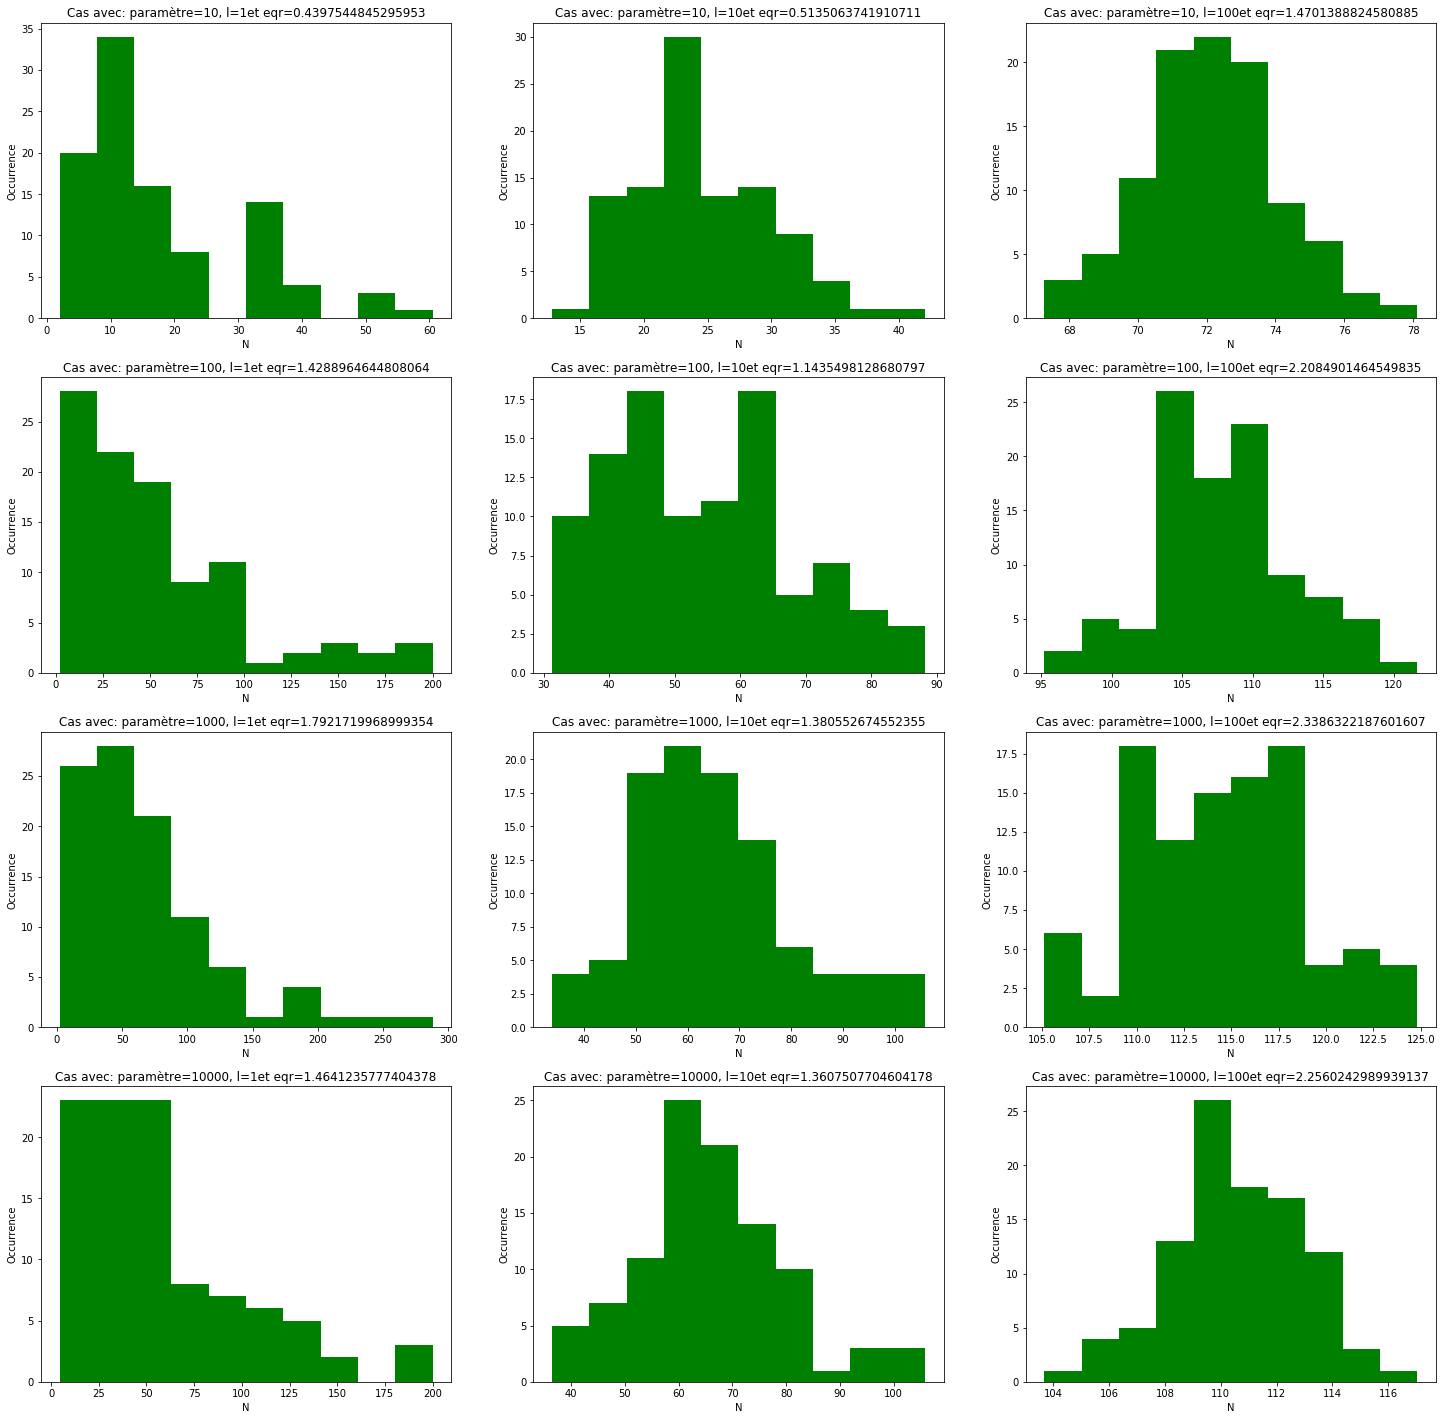

In [8]:
#Il s'agit d'effectuer le même travail dans le cas du cycle. 
#La méthodologie est à peu près la même. 
#Les descriptions des étapes sont présentes dans le cas de l'hypercube.
N = 50
V = [i for i in range(1, N+1)]
param = [10, 100, 1000, 10000]
Lvalues = [1, 10, 100]
eqr = [0,0,0]
Nvalues = [[],[],[]]
ngr = "cycle"
i0 = 0
Y = []
k = 1
fig=plt.figure(figsize=(25,25))

#Tout étant bien défini, on peut écrire notre boucle:
for num in param:
    for i in range(100): #On veut 100 réalisations
        l = 0
        m = 0
        Y.append(simul(V, ngr, N, num, i0))
        for lv in range(len(Lvalues)): 
            while l<Lvalues[lv]:
                Y.append(simul(V,ngr,N,num,i0))
                m = m+1
                if appartient(Y[m], Y[:(m-1)]):
                    Cl = m
                    l = l+1
            ajout = ((Cl**2/(2*Lvalues[lv]))/(N-1))**2
            eqr[lv] = eqr[lv] + ajout 
            Nvalues[lv].append(Cl**2/(2*Lvalues[lv]))
        Y=[]
        
    for lv in range(len(Lvalues)):
        eqr[lv]=(eqr[lv]/100)**(0.5)
        ax=fig.add_subplot(4,3,k)
        ax.hist(Nvalues[lv], bins=10, color = "green")
        ax.set_xlabel("N")
        ax.set_ylabel("Occurrence")
        ax.set_title("Cas avec: paramètre="+str(num)+", l="+str(Lvalues[lv])+"et eqr="+str(eqr[lv]))
        k = k+1
    Nvalues=[[],[],[]]
    eqr=[0,0,0]
    print("cas du paramètre égal à " + str(num)+" : complet")
    
    
plt.show()

<p style='text-align: justify;'> 
On remarque que l'erreure quadratique relative s'éloigne plus dans ce cas de sa valeur optimale égale à 1. On peut expliquer ce résultat par le fait qu'une marche aléatoire avec deux voisins au lieu de 10 estime moins bien la taille du graphe. Similairement au cas précédent de l'hypercube, l'erreur quadratique relative est proche de 1 pour $τ$ et $\ell$ ni trop faibles ni trop élevés, $(τ,\ell)=(100,10)$ étant le couple de valeurs optimales, comme dans le cas précédent.
</p>

***

<center><h3>Fin du projet</h3></center>

***